### matplotlib 차트 유형

1. histogram : 연속형값의 도수(빈도수/개수) 파악
2. bar plot : 범주형값의 개수, 또는 다른 연속값을 파악
3. scatter plot : 산포도(산점도) 두 연속값들의 분표 파악
4. line plot : 시계열데이터(연속값) 변화 파악
5. box plot : 연속형 값의 사분위, 이상치 파악
6. pie chart : 전체 범위 중의 비율

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib

font_path = '/Users/hwangjunho/Desktop/encore_skn11/04_data-analysis/03_matplotlib/AppleSDGothicNeo.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

##### Histogram

- 연속형 값을 일정 구간을 나누어 구간별 데이터포인트의 빈도를 시각화
    - x축 : 연속형 데이터
    - y축 : 구간별 데이터포인트의 개수(합)

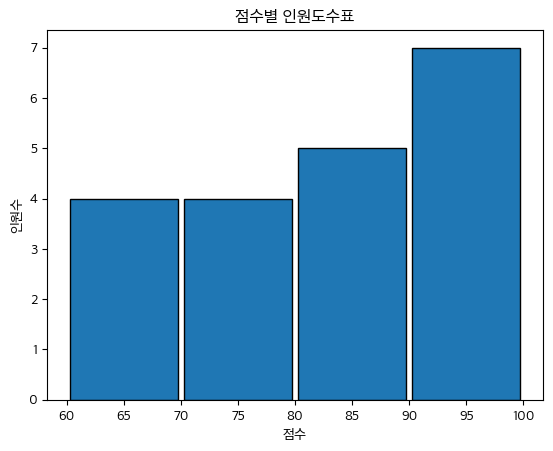

In [2]:
scores = [100, 95, 97, 98, 99, 90, 80, 81, 84, 88, 70, 78, 79, 70, 65, 66, 61, 64, 100, 89]

bins = [60, 70, 80, 90, 100]

plt.hist(scores, bins=bins, edgecolor='black', rwidth=0.95)
# bins = 나뉠 구간의 개수 (기본값 = 10)
# edgecolor : 히스토그램 막대의 경계선 색상
# rwith : 0~1 사이의 값으로 상대적 너비 조정

plt.xlabel('점수')
plt.ylabel('인원수')
plt.title('점수별 인원도수표')
plt.show()

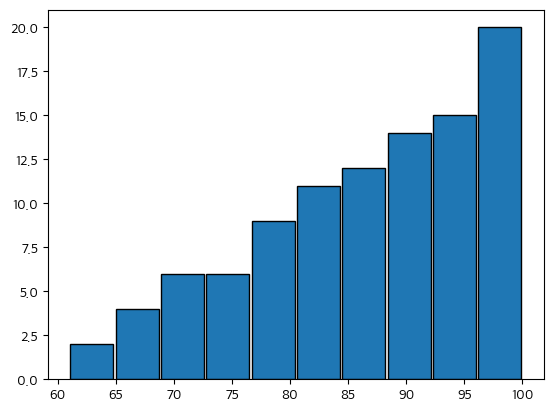

In [3]:
plt.hist(scores, edgecolor='black', rwidth=0.95, cumulative=True)
# cumulative : 누적 값
plt.show()

In [7]:
# 파일 읽어오기
df = pd.read_csv('/Users/hwangjunho/Desktop/encore_skn11/04_data-analysis/03_matplotlib/data/crypto_daily_returns.csv')
df

,Date,BTC,ETH,LTC
0,9/17/2014,0.000000,0.000000,0.000000
1,9/18/2014,-7.192558,NaN,-7.379983
2,9/19/2014,-6.984264,NaN,-7.629499
3,9/20/2014,3.573492,NaN,-0.955003
4,9/21/2014,-2.465854,NaN,-0.945300
...,...,...,...,...
2380,3/28/2021,-0.040672,-1.464535,0.107149
2381,3/29/2021,3.216138,7.587343,5.105316
2382,3/30/2021,2.021625,1.447984,1.135017
2383,3/31/2021,0.001936,3.918042,0.415392


In [8]:
# 데이터프레임 메타데이터 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2385 entries, 0 to 2384
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2385 non-null   object 
 1   BTC     2385 non-null   float64
 2   ETH     2061 non-null   float64
 3   LTC     2385 non-null   float64
dtypes: float64(3), object(1)
memory usage: 74.7+ KB


In [9]:
df.describe()

,BTC,ETH,LTC
count,2385.000000,2061.000000,2385.000000
mean,0.280359,0.538739,0.315764
std,3.887338,6.471972,5.783455
min,-37.169539,-72.824950,-40.224814
25%,-1.209796,-2.257161,-1.922825
50%,0.203326,0.043409,-0.022066
75%,1.804233,2.912284,2.078286
max,25.247169,50.732307,66.765321


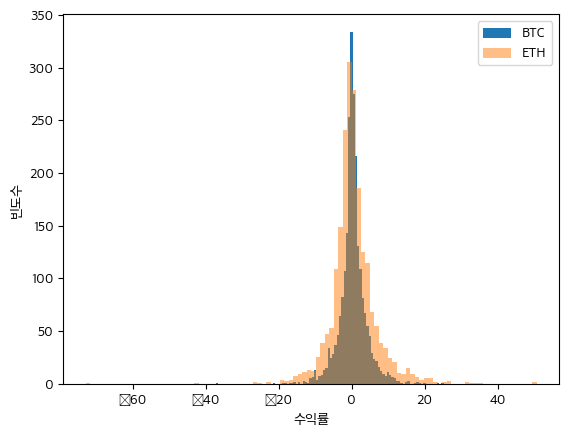

In [15]:
plt.hist(df['BTC'], bins=100, label='BTC')
plt.hist(df['ETH'], bins=100, label='ETH', alpha=0.5)
plt.legend()

plt.xlabel('수익률')
plt.ylabel('빈도수')
plt.show()

##### Bar Plot

- 막대 차트 
- 범주형 데이터와 연속형 데이터(막대의 길이)의 관계를 시각화
    - x축 : 범주형 데이터 카테고리 
    - y축 : 연속형 데이터 (총합, 평균)

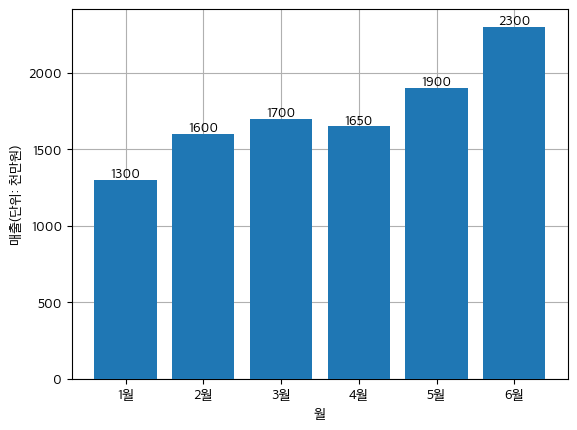

In [26]:
# 월별 매출 데이터
df = pd.DataFrame({
    'month': ['1월', '2월', '3월', '4월', '5월', '6월'],
    'sales': [1300, 1600, 1700, 1650, 1900, 2300]
})

# zorder : z측 깉이 설정 (숫자가 클수록 위에 그려짐)
plt.bar(df['month'], df['sales'], zorder=10)

for i, var in enumerate(df['sales']):
    # x축 위치. y축 위치, 텍스트, 텍스트 정렬(위치)
    plt.text(i, var+10, str(var), ha='center')

plt.xlabel('월')
plt.ylabel('매출(단위: 천만원)')
plt.grid(zorder=1)
plt.show()

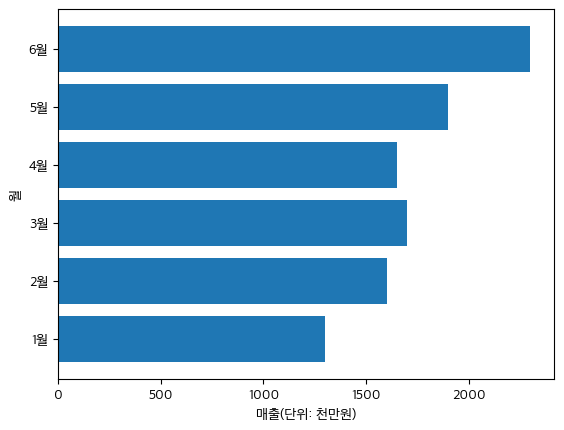

In [29]:
# 수평 막댁 그래프
plt.barh(df['month'], df['sales'])

plt.ylabel('월')
plt.xlabel('매출(단위: 천만원)')
plt.show()

In [32]:
# 나라별 맥주의 갯수 시각화
beers_df = pd.read_csv('/Users/hwangjunho/Desktop/encore_skn11/04_data-analysis/03_matplotlib/data/beers.csv')
beers_df

,beer_name,beer_type,country
0,Heineken,Pale Lager,Netherlands
1,Guinness,Stout,Ireland
2,Corona Extra,Pale Lager,Mexico
3,Stella Artois,Pilsner,Belgium
4,Budweiser,Pale Lager,USA
5,Hoegaarden,Witbier,Belgium
6,Carlsberg,Pale Lager,Denmark
7,Sapporo,Lager,Japan
8,Asahi,Lager,Japan
9,Becks,Pilsner,Germany


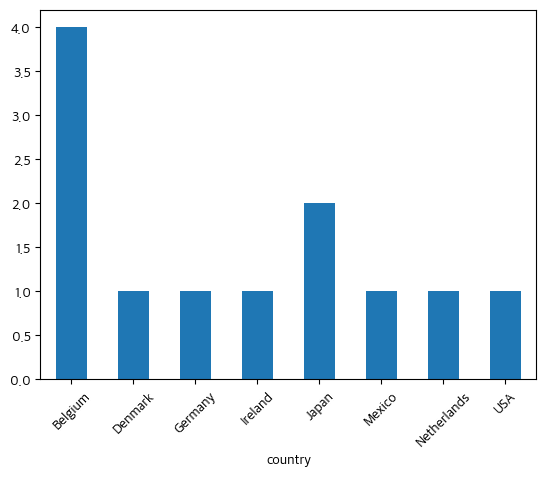

In [41]:
beer_df_groupby = beers_df.groupby('country')['beer_name'].count()
# print(beer_df_groupby)

# bar chart
# plt.bar(beer_df_groupby.index, beer_df_groupby)

# histogram
#plt.hist(beers_df['country'], bins=beers_df['country'].nunique(), rwidth=0.9)

# Series/DataFrame 기준으러 plot() 함수 사용
beer_df_groupby.plot(kind='bar')

plt.xticks(rotation=45)
plt.show()

##### Line plot

- 시계열 데이터에서 변화하는 값의 추이를 시각화
    - x축 : 연속형 데이터 
    - y축 : 연속형 데이터

In [42]:
# 주가 추이
df = pd.DataFrame({
    'Data' : pd.date_range(start='2025-01-01', periods=14, freq='D'),
    'APPL' : np.random.randint(100, 150, 14),
    'MSFT' : np.random.randint(50, 150, 14)
})
df

,Data,APPL,MSFT
0,2025-01-01,117,55
1,2025-01-02,142,62
2,2025-01-03,114,70
3,2025-01-04,126,101
4,2025-01-05,105,115
5,2025-01-06,143,113
6,2025-01-07,127,119
7,2025-01-08,127,57
8,2025-01-09,118,127
9,2025-01-10,116,81


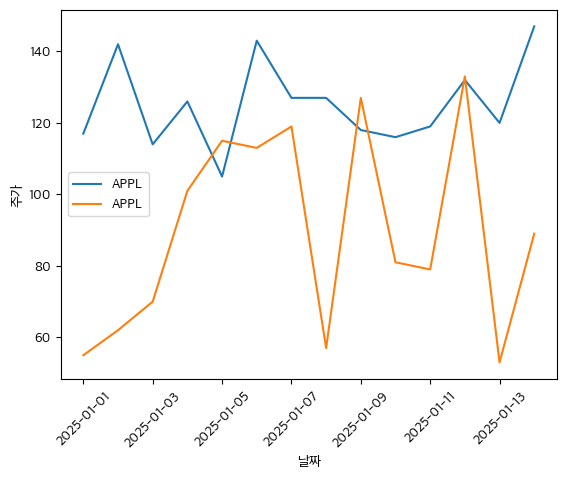

In [43]:
plt.plot(df['Data'], df['APPL'], label='APPL')
plt.plot(df['Data'], df['MSFT'], label='APPL')

plt.xlabel('날짜')
plt.ylabel('주가')
plt.xticks(rotation=45)
plt.legend()
plt.show()

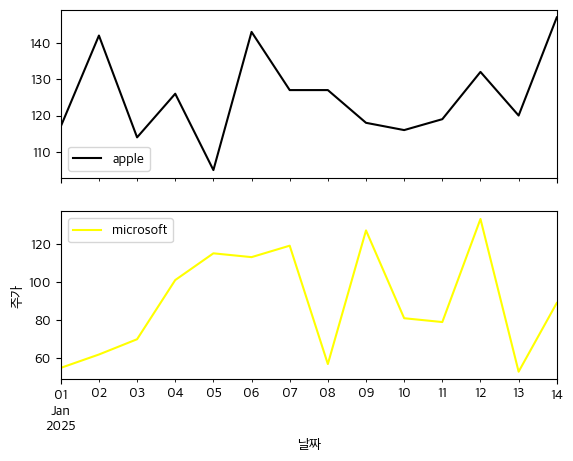

In [47]:
df.plot(
    x='Data',
    y=['APPL', 'MSFT'],
    color = ['black', 'yellow'],
    label=['apple', 'microsoft'],   # label은 legend를 설정하지 않아도 만들어짐
    subplots=True                   # subplots=True로 설정하면 각각의 그래프를 따로 그림
)

plt.xlabel('날짜')
plt.ylabel('주가')
plt.show()

In [49]:
# 코인 주가 추이 
crypto_df = pd.read_csv('/Users/hwangjunho/Desktop/encore_skn11/04_data-analysis/03_matplotlib/data/crypto_daily_prices.csv')
crypto_df

,Date,BTC-USD Price,ETH-USD Price,LTC-USD Price
0,9/17/2014,457.334015,NaN,5.058550
1,9/18/2014,424.440002,NaN,4.685230
2,9/19/2014,394.795990,NaN,4.327770
3,9/20/2014,408.903992,NaN,4.286440
4,9/21/2014,398.821014,NaN,4.245920
...,...,...,...,...
2380,3/28/2021,55950.746090,1691.355957,185.028488
2381,3/29/2021,57750.199220,1819.684937,194.474777
2382,3/30/2021,58917.691410,1846.033691,196.682098
2383,3/31/2021,58918.832030,1918.362061,197.499100


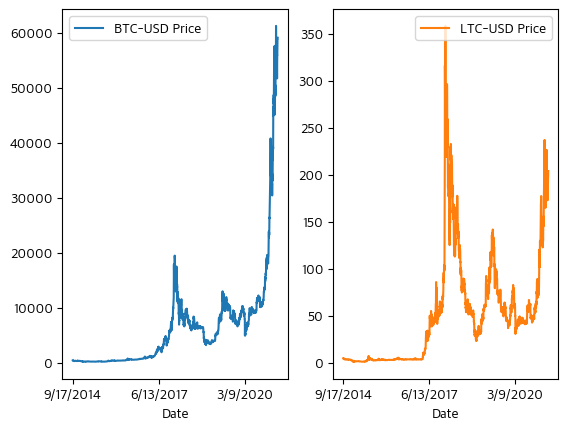

In [58]:
crypto_df.plot(
    x='Date', 
    y=['BTC-USD Price', 'LTC-USD Price'], 
    subplots=True,
    layout=(1, 2)
)

plt.show()

##### Scatter Plot

- 두 축의 변수 관계를 시각화
- 두 변수 간 상관광계, 클러스터링, 이상치 파악에 도움

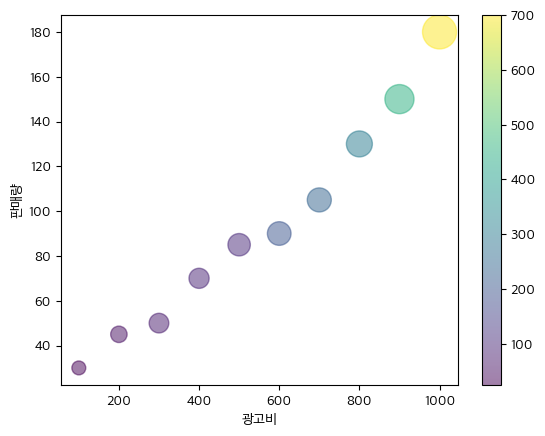

In [63]:
df = pd.DataFrame({
    'ad_budget': np.arange(100, 1001, 100), 
    'sales': [30, 45, 50, 70, 85, 90, 105, 130, 150, 180],
    'visitor': [100, 140, 200, 210, 260, 290, 300, 350, 440, 600],
    'colors': [25, 50, 70, 90, 100, 200, 235, 300, 450, 700]
})

# x축, y축, s=점의 크기, c=점의 색상(컬러 값으로 연속 데이터 표현), alpha=투명도
plt.scatter(df['ad_budget'], df['sales'], s=df['visitor'], c=df['colors'], alpha=0.5)

plt.colorbar()

plt.xlabel('광고비')
plt.ylabel('판매량')  
plt.show() 

##### Pie Chart

- 전체에서 각 부분이 기여하는 비율을 시각화

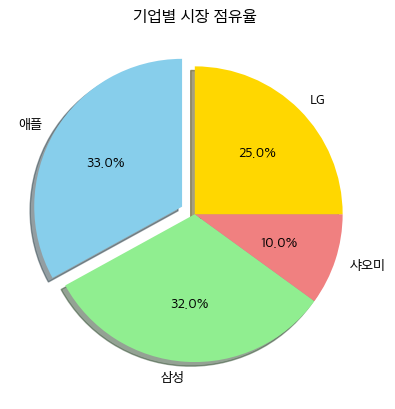

In [76]:
df = pd.DataFrame({
    'label': ['애플', '삼성', '샤오미', 'LG'],
    'market_share': [33, 32, 10, 25], 
    'sales': [1345, 234, 545, 454],
    'explode': [0.1, 0, 0, 0]
})

plt.pie(
    df['market_share'], 
    labels=df['label'], 
    autopct='%.1f%%', 
    startangle=90,
    explode=df['explode'],
    colors=['skyblue', 'lightgreen', 'lightcoral', 'gold'], 
    shadow=True
)

plt.title('기업별 시장 점유율')
plt.show()

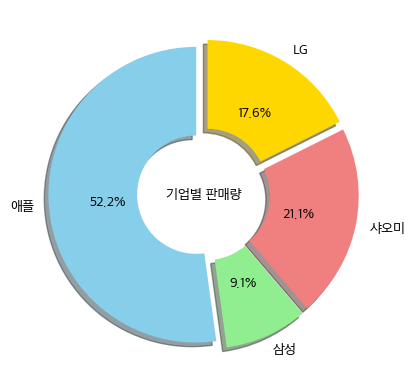

In [82]:
plt.pie(
    df['sales'], 
    labels=df['label'], 
    autopct='%.1f%%', 
    startangle=90,
    explode=[.05, .05, .05, .05],
    colors=['skyblue', 'lightgreen', 'lightcoral', 'gold'], 
    wedgeprops={'width': 0.6},
    shadow=True
)

plt.text(0, 0, '기업별 판매량', ha='center', va = 'center')
plt.show()

##### Box Plot

- 연속형 데이터의 분포를 사분위수로 시각화
- 이상치 outlier를 도출하는 데에 효과적
    - x축 : 이산값(범주형) 데이터
    - y축 : 연속형 데이터

- 표현되는 값들
    - max, Q3, Q2, Q1, min : 최대값, 3분위수(75%), 2분위수(50%, 중위값), 1분위수(25%), 최소값
    - IQR (Inter-quartile Range) : 사분범위

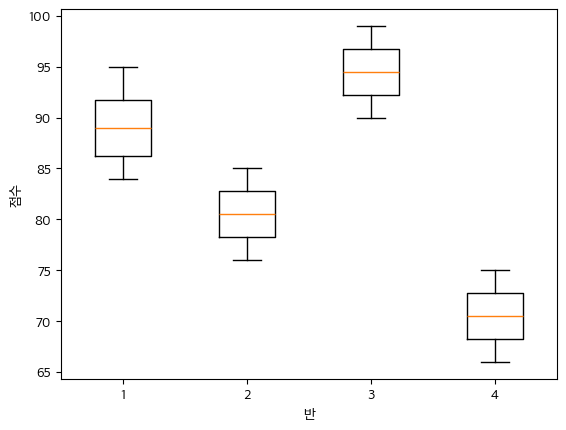

In [86]:
# 반별 시험 성적 데이터((2차원 배열)
class_scores = [
    [85, 88, 90, 92, 93, 87, 95, 91, 84, 86],  # Class A
    [78, 82, 85, 80, 79, 84, 81, 83, 77, 76],  # Class B
    [92, 95, 96, 94, 90, 97, 93, 91, 98, 99],  # Class C
    [70, 72, 68, 75, 74, 69, 73, 71, 66, 67]   # Class D
]

plt.boxplot(class_scores)

plt.xlabel('반')
plt.ylabel('점수')

plt.show()

In [90]:
data = class_scores[0]

print('최솟값', np.min(data))
print('사분위수(Q1): ', np.percentile(data, 25))
print('사분위수(Q2): ', np.percentile(data, 50))
print('사분위수(Q3): ', np.percentile(data, 75))
print('최솟값', np.max(data))

최솟값 84
사분위수(Q1):  86.25
사분위수(Q2):  89.0
사분위수(Q3):  91.75
최솟값 95


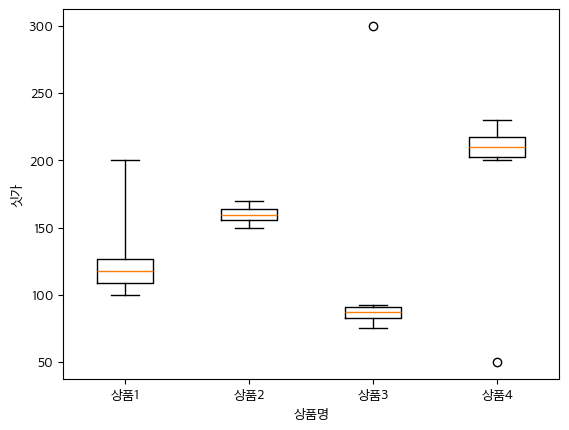

In [95]:
weird_data = [
    [100, 120, 130, 110, 115, 105, 125, 200],   # 이상치 200
    [150, 160, 170, 155, 165, 158],
    [80, 85, 90, 75, 92, 87, 300],             # 이상치 300
    [200, 220, 210, 205, 215, 230, 50]          # 이상치 50   
]

# whis 기본값은 1.5
# [참고] 수염의 길이 계산 공식 : [Q3 + (IQR * whis), Q1 - (IQR * whis)]
# [참고] IQR = Q3 - Q1

plt.boxplot(weird_data, whis=5)
plt.xticks([1, 2, 3, 4], ['상품1', '상품2', '상품3', '상품4'])
plt.xlabel('상품명')
plt.ylabel('싯가')
plt.show()